In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
#import matplotlib.animation as animation

from matplotlib.animation import FuncAnimation
from datetime import datetime, timedelta
import cartopy.crs as ccrs

## Load data

In [2]:
df_oct = pd.read_csv("../data/DL_FIRE_M6_159160/fire_archive_M6_159160.csv")
df_oct["acq_date"] = pd.to_datetime(df_oct["acq_date"])
df_oct[["latitude_r","longitude_r"]] = df_oct[["latitude","longitude"]].round(0)
df_oct = df_oct.loc[df_oct.acq_date.dt.month==10]
df = pd.read_csv("../data/DL_FIRE_M6_172855/fire_archive_M6_172855.csv")
df["acq_date"] = pd.to_datetime(df["acq_date"])
df[["latitude_r","longitude_r"]] = df[["latitude","longitude"]].round(0)
df = pd.concat([df_oct,df])

In [3]:
brightness_sum = df.groupby(['latitude_r','longitude_r','acq_date'],as_index=False)[['brightness']].sum()

## Set up formatting for the video files

In [4]:
Writer = FuncAnimation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

AttributeError: type object 'FuncAnimation' has no attribute 'writers'

In [ ]:
brightness_sum.head()

## Animation Function

0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
10
11
11
11
11
11
11
11
11
11
11
12
12
12
12
12
12
12
12
12
12
13
13
13
13
13
13
13
13
13
13
14
14
14
14
14
14
14
14
14
14
15
15
15
15
15
15
15
15
15
15
16
16
16
16
16
16
16
16
16
16
17
17
17
17
17
17
17
17
17
17
18
18
18
18
18
18
18
18
18
18
19
19
19
19
19
19
19
19
19
19
20
20
20
20
20
20
20
20
20
20
21
21
21
21
21
21
21
21
21
21
22
22
22
22
22
22
22
22
22
22
23
23
23
23
23
23
23
23
23
23
24
24
24
24
24
24
24
24
24
24
25
25
25
25
25
25
25
25
25
25
26
26
26
26
26
26
26
26
26
26
27
27
27
27
27
27
27
27
27
27
28
28
28
28
28
28
28
28
28
28
29
29
29
29
29
29
29
29
29
29
30
30
30
30
30
30
30
30
30
30
31
31
31
31
31
31
31
31
31
31
32
32
32
32
32
32
32
32
32
32
33
33
33
33
33
33
33
33
33
33
34
34
34
34
34
34
34
34
34
34
35
35
35
35
35
35
35
35
35
35
36
36
36
36
36
36


232
232
232
232
232
232
232
233
233
233
233
233
233
233
233
233
233
234
234
234
234
234
234
234
234
234
234
235
235
235
235
235
235
235
235
235
235
236
236
236
236
236
236
236
236
236
236
237
237
237
237
237
237
237
237
237
237
238
238
238
238
238
238
238
238
238
238
239
239
239
239
239
239
239
239
239
239
240
240
240
240
240
240
240
240
240
240
241
241
241
241
241
241
241
241
241
241
242
242
242
242
242
242
242
242
242
242
243
243
243
243
243
243
243
243
243
243
244
244
244
244
244
244
244
244
244
244
245
245
245
245
245
245
245
245
245
245
246
246
246
246
246
246
246
246
246
246
247
247
247
247
247
247
247
247
247
247
248
248
248
248
248
248
248
248
248
248
249
249
249
249
249
249
249
249
249
249
250
250
250
250
250
250
250
250
250
250
251
251
251
251
251
251
251
251
251
251
252
252
252
252
252
252
252
252
252
252
253
253
253
253
253
253
253
253
253
253
254
254
254
254
254
254
254
254
254
254
255
255
255
255
255
255
255
255
255
255
256
256
256
256
256
256
256
256
256
256
257
257
257


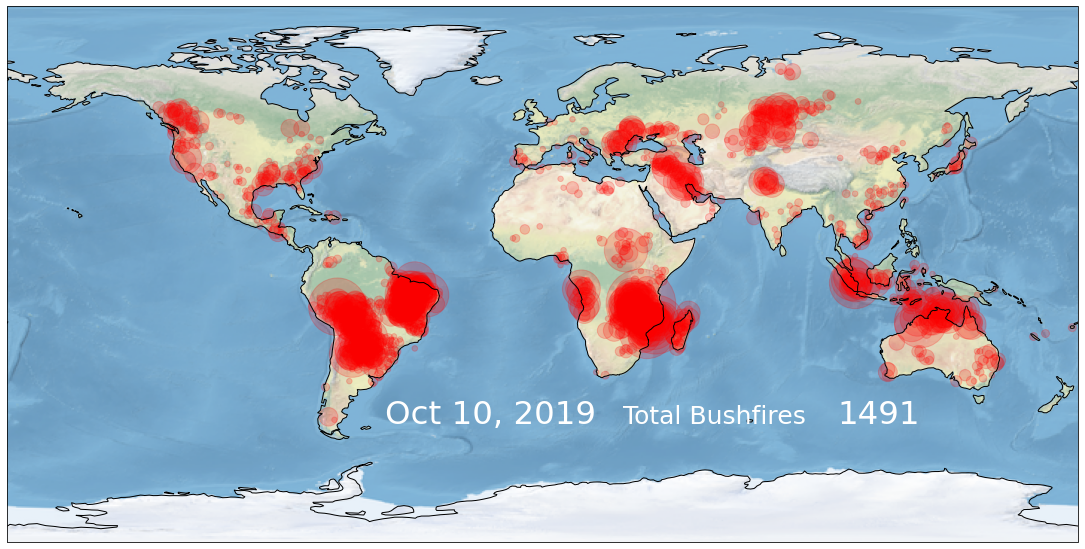

In [5]:
start_date = datetime(2019, 10, 10)
end_date = datetime(2020, 9, 30)
fig = plt.figure(figsize=(19.2, 10.8))

frames=[]
interval_length = 10
for c in range((end_date - start_date).days):
    for interval in range(interval_length):
        frames.append(c)

def animate(days):
    print(days)
    fig.clear()
    ax = plt.axes(projection=ccrs.PlateCarree())
    date = start_date + timedelta(days)
    df = brightness_sum.loc[brightness_sum['acq_date']==date]
    
    longs = df["longitude_r"]
    lats = df["latitude_r"]
    sizes = df['brightness']/10
    
    ax.scatter(longs,lats,s=sizes, alpha=0.2,color="r",
               transform=ccrs.PlateCarree())

    ax.stock_img()
    ax.coastlines()
    
    fontname = 'DejaVu Sans'
    fontsize = 25
    # Positions for the date and grad counter
    date_x = -53
    date_y = -50
    date_spacing = 80
    date = df.iloc[0]['acq_date']
    
    # Date text
    ax.text(date_x, date_y, 
            f"{date.strftime('%b %d, %Y')}", 
            color='white',
            fontname=fontname, fontsize=fontsize*1.3,
            transform=ccrs.PlateCarree())
    # Total grad counts
    ax.text(date_x + date_spacing, date_y, 
            "Total Bushfires", color='white',
            fontname=fontname, fontsize=fontsize,
            transform=ccrs.PlateCarree())
    ax.text(date_x + date_spacing*1.9, date_y, 
            f"{df['brightness'].count()}",
            color='white', ha='left',
            fontname=fontname, fontsize=fontsize*1.3,
            transform=ccrs.PlateCarree())
    
anim = FuncAnimation(fig, animate, frames=frames)

#plt.show()
anim.save('../animations/bushfire_animation.mp4', writer=writer)
#plt.rcParams['animation.html']= 'jshtml'